In [30]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import style
style.use('seaborn')
import seaborn as sns 

In [31]:
df = pd.read_csv('/home/kanishk/Downloads/dara/tesla/tesla_dataset.csv')

In [32]:
df.head()

Date       Open   High        Low      Close  Adj Close    Volume
0  2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1  2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2  2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3  2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4  2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900

In [33]:
df.drop(['Adj Close'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2416 non-null   object 
 1   Open    2416 non-null   float64
 2   High    2416 non-null   float64
 3   Low     2416 non-null   float64
 4   Close   2416 non-null   float64
 5   Volume  2416 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 113.4+ KB


In [48]:
print('Features : ',df.shape[1])
print('Examples : ',df.shape[0])

Features :  6
Examples :  2416


In [49]:
#df.Date = pd.to_datetime(df.Date,errors='coerce')

In [34]:
df.isnull()

Date   Open   High    Low  Close  Volume
0     False  False  False  False  False   False
1     False  False  False  False  False   False
2     False  False  False  False  False   False
3     False  False  False  False  False   False
4     False  False  False  False  False   False
...     ...    ...    ...    ...    ...     ...
2411  False  False  False  False  False   False
2412  False  False  False  False  False   False
2413  False  False  False  False  False   False
2414  False  False  False  False  False   False
2415  False  False  False  False  False   False

[2416 rows x 6 columns]

In [51]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [52]:
sns.heatmap(df.isnull())

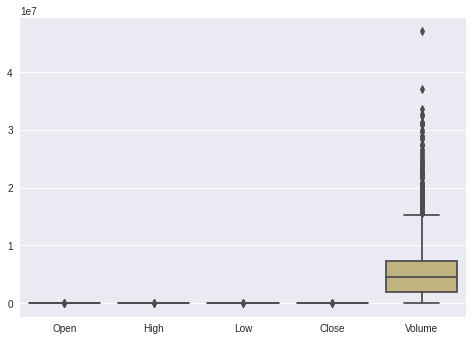

In [53]:
sns.boxplot(data = df)

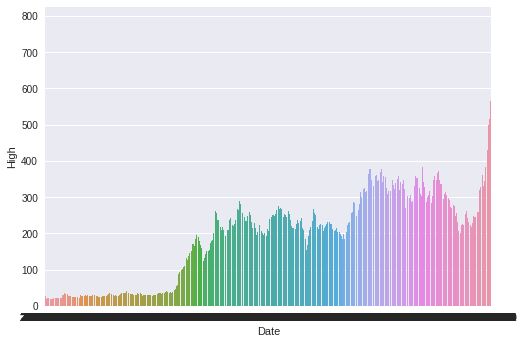

In [55]:
sns.barplot(x='Date',y='High',data = df)

In [36]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns :
    df[col] = le.fit_transform(df[col])

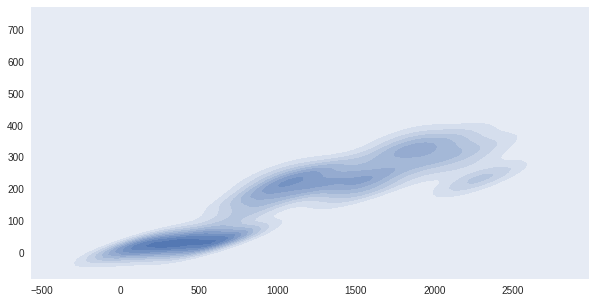

In [57]:
fig,ax  = plt.subplots(figsize = (10,5))
sns.kdeplot(data = df,shade=True,ax=ax)
plt.show()

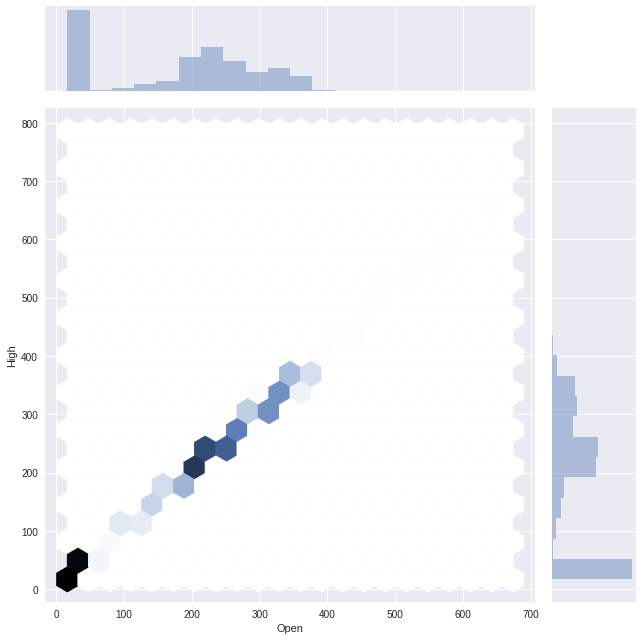

In [58]:
sns.jointplot(x='Open',y='High',kind='hex',height=9,data=df)

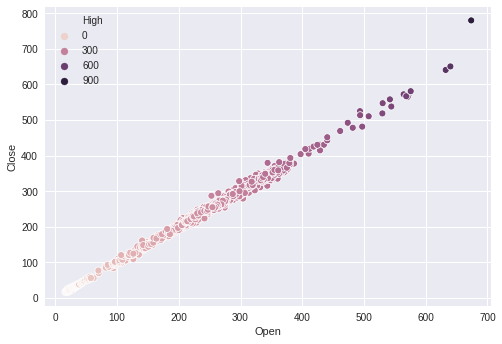

In [59]:
sns.scatterplot(x='Open',y='Close',hue='High',data=df)

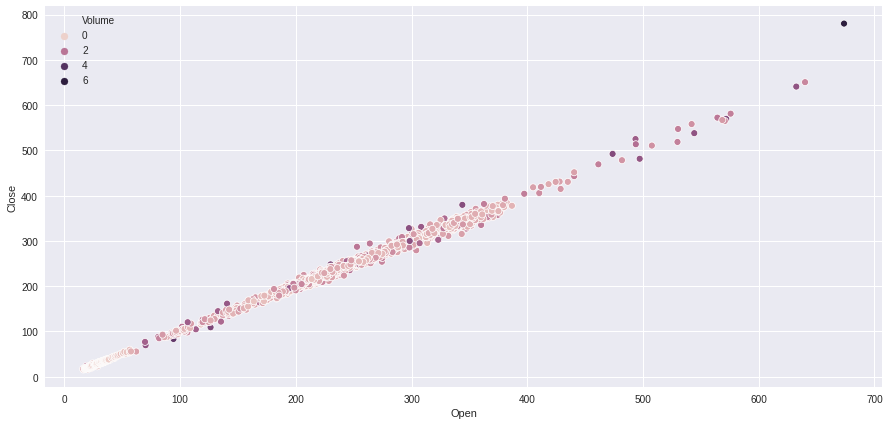

In [60]:
fig,ax = plt.subplots(figsize=(15,7))
sns.scatterplot(x='Open',y='Close',hue='Volume',data=df,ax=ax)
plt.show()

# Machine Learning

For the stock prediction  Linear Regression wouuld be perfect , but here we are using some more Algorithms just for fun as well as practice.

First let's spilt the data into Train and Test data, by using test_split_data funtion

In [37]:
from sklearn.model_selection import train_test_split
X = df.drop(['High'],axis=1)
y  = df.High
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [39]:
model = KNeighborsClassifier(n_neighbors=5)

In [40]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [49]:
y_pred = model.predict(X_test)
print('Accuracy score :  ',accuracy_score(y_test,y_pred),'%')

Accuracy score :   0.0016556291390728477 %


In [50]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestRegressor()

In [51]:
y_pred = model.predict(X_test)
print('Accuracy score :  ',accuracy_score(y_test,y_pred),'%')

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets